#import libraries

In [92]:
#import libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [93]:
df=pd.read_csv("/content/Whickham.csv")

In [94]:
df.head()

,outcome,smoker,age
0,Alive,Yes,23
1,Alive,Yes,18
2,Dead,Yes,71
3,Alive,No,67
4,Alive,No,64


In [95]:
df.shape

(1314, 3)

In [96]:
df.columns

Index(['outcome', 'smoker', 'age'], dtype='object')

In [97]:
df.dtypes

outcome    object
smoker     object
age         int64
dtype: object

In [98]:
df.isnull().sum()

outcome    0
smoker     0
age        0
dtype: int64

In [99]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1314 entries, 0 to 1313
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   outcome  1314 non-null   object
 1   smoker   1314 non-null   object
 2   age      1314 non-null   int64 
dtypes: int64(1), object(2)
memory usage: 30.9+ KB


In [100]:
df.outcome.unique()

array(['Alive', 'Dead'], dtype=object)

In [101]:
df.outcome.value_counts()

Alive    945
Dead     369
Name: outcome, dtype: int64

<Axes: >

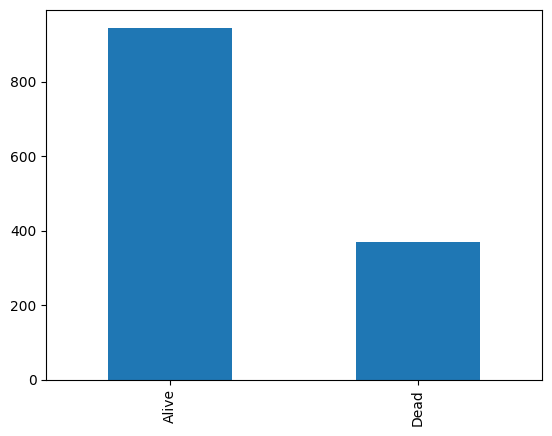

In [102]:
df.outcome.value_counts().plot(kind='bar')

In [103]:
df.smoker.unique()

array(['Yes', 'No'], dtype=object)

In [104]:
df.smoker.value_counts()

No     732
Yes    582
Name: smoker, dtype: int64

<Axes: >

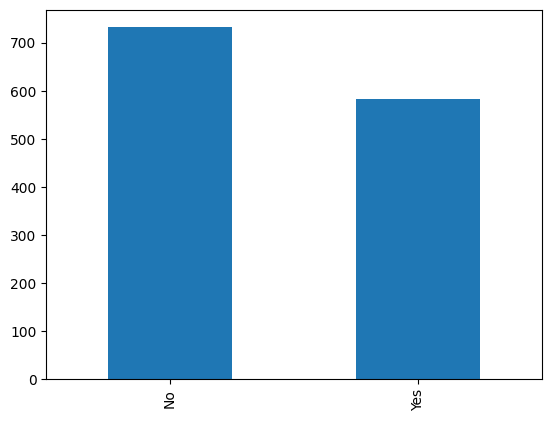

In [105]:
df.smoker.value_counts().plot(kind='bar')

In [106]:
df.age.mean()

46.92009132420091

<Axes: xlabel='age', ylabel='Count'>

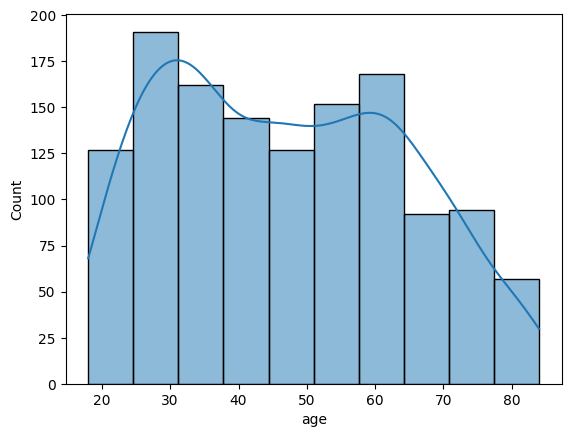

In [107]:
sns.histplot(df["age"],kde=True,bins=10)

<Axes: ylabel='outcome'>

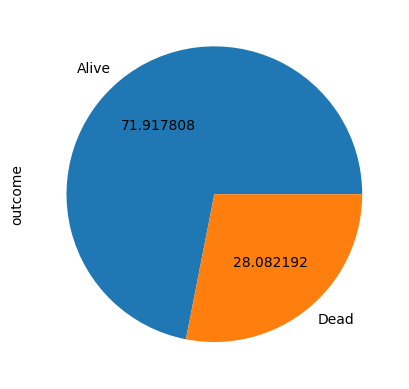

In [108]:
df["outcome"].value_counts().plot(kind="pie",autopct="%2f")

<Axes: ylabel='smoker'>

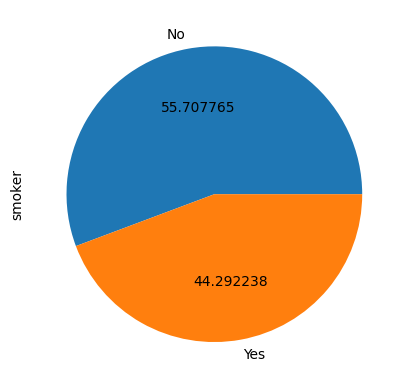

In [109]:
df["smoker"].value_counts().plot(kind="pie",autopct="%2f")

###   Data preprocessing

In [110]:
df["outcome"]=df["outcome"].astype("category")
df["outcome"]=df["outcome"].cat.codes

In [111]:
df["smoker"]=df["smoker"].astype("category")
df["smoker"]=df["smoker"].cat.codes

In [112]:
df.dtypes

outcome     int8
smoker      int8
age        int64
dtype: object

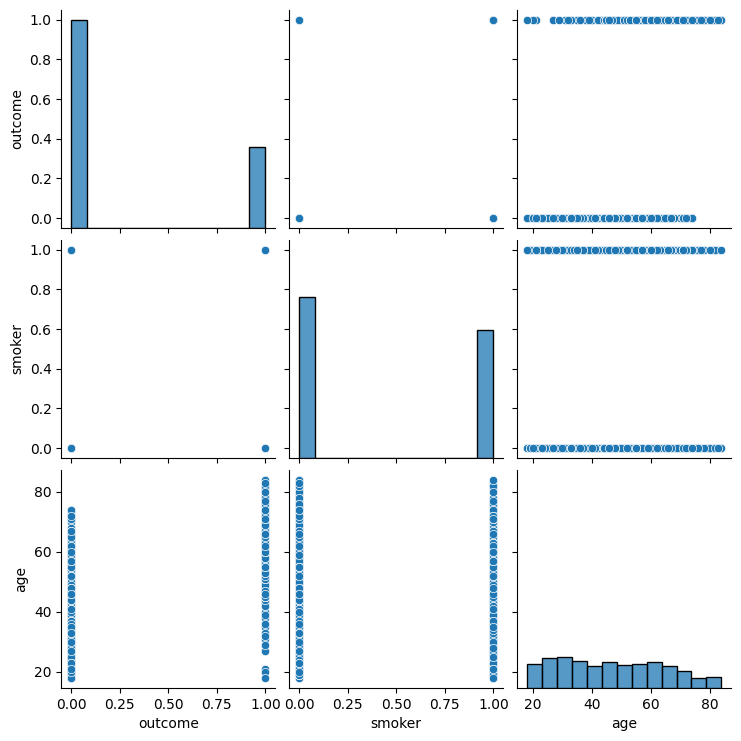

In [113]:
sns.pairplot(df)

<Axes: >

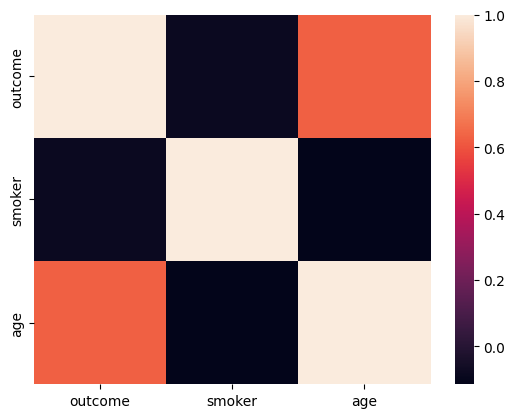

In [114]:
sns.heatmap(df.corr())

In [115]:
df.head()

,outcome,smoker,age
0,0,1,23
1,0,1,18
2,1,1,71
3,0,0,67
4,0,0,64


######         Define X and y

In [117]:
# Step 1: Split into training & testing sets

X=df[['outcome']] #Matrix
y=df['outcome'] #Vector

X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=42)

#    Train_Test_Split

In [120]:
len(X_train)

985

In [121]:
len(y_test)

329

In [122]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [123]:
model.fit(X_train,y_train)

LogisticRegression()

In [124]:
model.intercept_

array([-4.46299539])

In [125]:
model.coef_

array([[8.00028445]])

In [126]:
# Step 4 (part 1): Generate predicted values.

model.predict(X_test)

array([0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1,
       0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0,

In [127]:
# Step 4 (part 2): Generate predicted probabilities.
np.round(model.predict_proba(X_test),2)

array([[0.99, 0.01],
       [0.03, 0.97],
       [0.99, 0.01],
       [0.99, 0.01],
       [0.99, 0.01],
       [0.99, 0.01],
       [0.99, 0.01],
       [0.99, 0.01],
       [0.99, 0.01],
       [0.99, 0.01],
       [0.03, 0.97],
       [0.03, 0.97],
       [0.99, 0.01],
       [0.99, 0.01],
       [0.99, 0.01],
       [0.99, 0.01],
       [0.03, 0.97],
       [0.03, 0.97],
       [0.99, 0.01],
       [0.99, 0.01],
       [0.99, 0.01],
       [0.99, 0.01],
       [0.03, 0.97],
       [0.99, 0.01],
       [0.99, 0.01],
       [0.99, 0.01],
       [0.03, 0.97],
       [0.99, 0.01],
       [0.99, 0.01],
       [0.03, 0.97],
       [0.03, 0.97],
       [0.03, 0.97],
       [0.99, 0.01],
       [0.03, 0.97],
       [0.99, 0.01],
       [0.03, 0.97],
       [0.99, 0.01],
       [0.03, 0.97],
       [0.99, 0.01],
       [0.99, 0.01],
       [0.99, 0.01],
       [0.03, 0.97],
       [0.99, 0.01],
       [0.99, 0.01],
       [0.99, 0.01],
       [0.99, 0.01],
       [0.99, 0.01],
       [0.03,

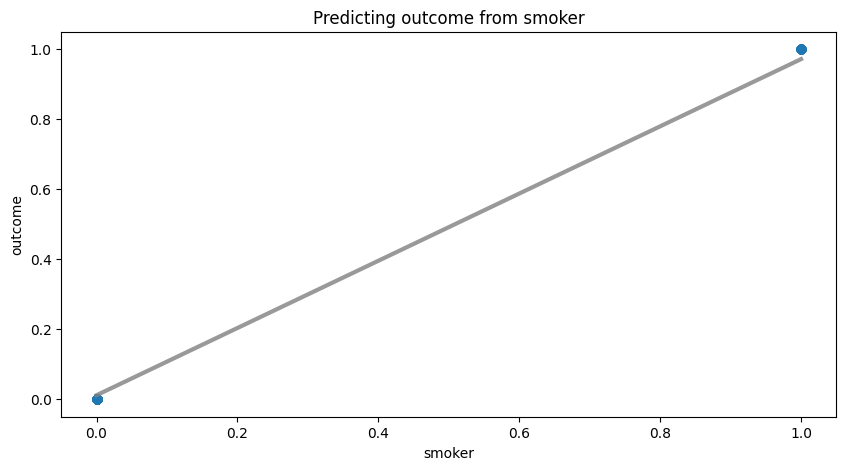

In [132]:
# Visualizing logistic regression probabilities.

plt.figure(figsize = (10, 5))



plt.scatter(X_test, y_test,s=None);

plt.plot(X_test.sort_values('outcome'),
         model.predict_proba(X_test.sort_values('outcome'))[:,1],
         color = 'grey', alpha = 0.8, lw = 3)

plt.xlabel('smoker')
plt.ylabel('outcome')
plt.title('Predicting outcome from smoker');

In [133]:
# Step 5: Evaluate model.

model.score(X_train,y_train)

1.0

In [134]:
# Step 5: Evaluate model.

model.score(X_test,y_test)

1.0

In [ ]:
############## end #